# Part I: 
The business would like to understand what are the drivers that explain whether a resident will renew the lease or not. In other words, to understand what are the renewal promoters and detractors. At this stage, the purpose is to keep the analysis simple, interpretable, and easy to communicate, while also ensuring effectiveness and soundstatistical foundation.

In [1]:
#load in common libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from xgboost import plot_tree

In [90]:
#read in the dataset
df=pd.read_csv(r".csv")
df.head()

,lease_id,no_rent_change,rent_change_10,rent_change_20,lease_length_2,lease_length_3,lease_length_1,age_range_under_24,age_range_24_29,age_range_30_39,age_range_40_49,age_range_50_59,age_range_60,NoFinesViolations,PositiveSurvey,LatePayments,HOA_mandatory,Renewed
0,HPA0001,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1
1,HPA0002,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,HPA0003,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,HPA0004,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
4,HPA0005,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Exploratory Data Analysis

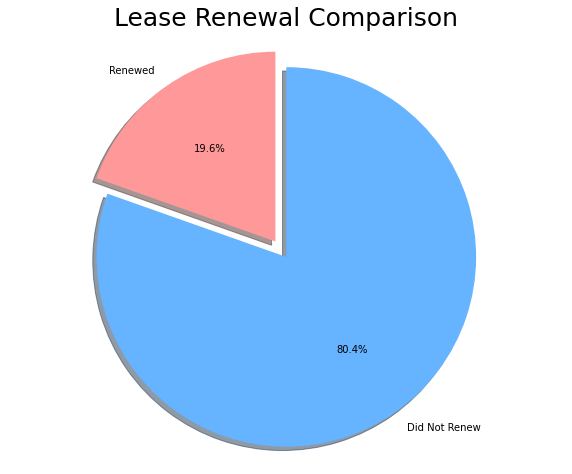

In [91]:
labels="Renewed", "Did Not Renew"
sizes=[df.Renewed[df['Renewed']==1].count(), df.Renewed[df['Renewed']==0].count()]
explode=(0,0.1)
fig1, ax1 = plt.subplots(figsize=(10,8))
ax1.pie(sizes, explode=explode, labels=labels, autopct= '%1.1f%%', shadow=True, startangle=90, colors = ['#ff9999','#66b3ff'])

ax1.axis('equal')
plt.title("Lease Renewal Comparison", size = 25)
plt.show()

To interpret this graph, on can conclude that about 20% of clients did renew their lease, while about 80% did not.Thus, we will use the chi-square test of independence to examine the data and answer whether we have enough evidence to conclude that the two categorical variables are related. 

# Hypothesis Test

- Ho (The null hypothesis): There is no relatipnship between the two categorical variables (they are independent). 
- Ha (The alternate hypothesis): There is a relationship between the two categorical variables (they are dependent). 

Steps: 
- build contingency table
- find the expected values
- calculate the chi-square statistic
- Reject or Fail to Reject the Null Hypothesis

In [4]:
## No Rent Change Column
no_rent_change_crosstab = pd.crosstab(df["no_rent_change"], df["Renewed"], margins = True)
no_rent_change_crosstab

Renewed,0,1,All
no_rent_change,,,
0,51797,10372,62169
1,12411,5270,17681
All,64208,15642,79850


We will use a heatmap to visualize this table.

<AxesSubplot:xlabel='Renewed', ylabel='no_rent_change'>

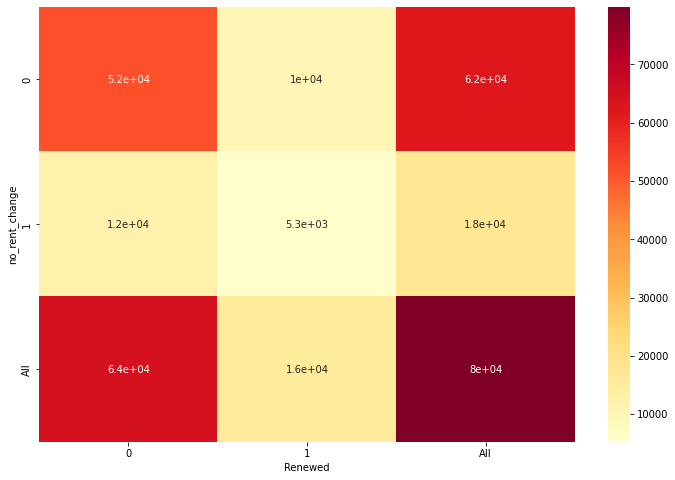

In [5]:
plt.figure(figsize=(12,8)) 
sns.heatmap(no_rent_change_crosstab, annot=True, cmap="YlOrRd")

## Identifying independent/dependent features

In [6]:
## Rent Change at most 10%
rent_change_10_crosstab = pd.crosstab(df["rent_change_10"], df["Renewed"], margins = True)

## Rent Change by more than 10% but at most 20%
rent_change_20_crosstab = pd.crosstab(df["rent_change_20"], df["Renewed"], margins = True)

## Lease Lengths 
lease_length_1_crosstab = pd.crosstab(df["lease_length_1"], df["Renewed"], margins = True)
lease_length_2_crosstab = pd.crosstab(df["lease_length_2"], df["Renewed"], margins = True)
lease_length_3_crosstab = pd.crosstab(df["lease_length_3"], df["Renewed"], margins = True)


## Age Ranges
age_range_under_24_crosstab = pd.crosstab(df["age_range_under_24"], df["Renewed"], margins = True)

age_range_24_29_crosstab = pd.crosstab(df["age_range_24_29"], df["Renewed"], margins = True)

age_range_30_39_crosstab = pd.crosstab(df["age_range_30_39"], df["Renewed"], margins = True)

age_range_40_49_crosstab = pd.crosstab(df["age_range_40_49"], df["Renewed"], margins = True)

age_range_50_59_crosstab = pd.crosstab(df["age_range_50_59"], df["Renewed"], margins = True)

age_range_60_crosstab = pd.crosstab(df["age_range_60"], df["Renewed"], margins = True)

## Positive Survey

positive_survey_crosstab = pd.crosstab(df["PositiveSurvey"], df["Renewed"], margins = True)

## No Fines or Violations
no_fines_crosstab = pd.crosstab(df["NoFinesViolations"], df["Renewed"], margins = True)

## No Late Payments

late_payments_crosstab = pd.crosstab(df["LatePayments"], df["Renewed"], margins = True)

## If there's a mandatory HOA fee on the Lease

HOA_crosstab = pd.crosstab(df["HOA_mandatory"], df["Renewed"], margins = True)


In [7]:
def categorical_dependency(crosstab_table):
    '''Pass Crosstab Table to function to check its dependency'''
    '''Use Chi2 from scipy library'''
    confidence_interval = 0.95
    
    chi_stat, p_value, degrees_of_freedom, expected = stats.chi2_contingency(crosstab_table)
    ## expected is just the cross table with expected values, no need to return it
    print ("Chi-Square Statistic value = {}".format(chi_stat))
    print ("P - Value = {}".format(p_value))
    alpha = 1.0 - confidence_interval ## Alpha will always be 0.05 in this case
    
    if p_value <= alpha:
        print('Dependent (reject H0)')
    else:  
         print('Independent (fail to reject H0)')
            
    return expected

In [8]:
## Pass in crosstab tables

## No Change in Rent
expected_table_1 = categorical_dependency(no_rent_change_crosstab)
print()
## Rent Changed by at most 10%
expected_table_2 = categorical_dependency(rent_change_10_crosstab)
print()

## Rent Changed by more than 10% and at most 20%
expected_table_3 = categorical_dependency(rent_change_20_crosstab)

## No Fines or Violations
expected_table_no_fines = categorical_dependency(no_fines_crosstab)
print()
## Check Late Payments
expected_table_late_payments = categorical_dependency(late_payments_crosstab)
print()
## Positive Survey
expected_table_positive = categorical_dependency(positive_survey_crosstab)
print()
## HOA Mandatory
expected_table_hoa = categorical_dependency(HOA_crosstab)

## Check Lease Length
## The resident has lived for at most 1 year on the lease
expected_table_lease_length_1 = categorical_dependency(lease_length_1_crosstab)
print()
## The resident has lvied for more than 1 but at most 2 years on the lease
expected_table_lease_length_2 = categorical_dependency(lease_length_2_crosstab)
print()
## The resident has lived for more than 2 but at most 3 years on the lease
expected_table_lease_length_3 = categorical_dependency(lease_length_3_crosstab)

## Now Lets Check the Age Ranges

## Under 24
expected_table_age_under_24 = categorical_dependency(age_range_under_24_crosstab)
print()
## 24 - 29
expected_table_age_20s = categorical_dependency(age_range_24_29_crosstab)
print()

## Age 30-39
expected_table_age_30 = categorical_dependency(age_range_30_39_crosstab)
print()

## Age 40 -49
expected_table_age_40 = categorical_dependency(age_range_40_49_crosstab)
print()

## Age 50- 59

expected_table_age_50 = categorical_dependency(age_range_50_59_crosstab)
print()

## Age 60+
expected_table_age_60 = categorical_dependency(age_range_60_crosstab)


Chi-Square Statistic value = 1504.8876490872017
P - Value = 0.0
Dependent (reject H0)

Chi-Square Statistic value = 48.930692575598414
P - Value = 6.036492920236767e-10
Dependent (reject H0)

Chi-Square Statistic value = 1306.5278738862546
P - Value = 1.278880430541224e-281
Dependent (reject H0)
Chi-Square Statistic value = 1326.0077950161763
P - Value = 7.642517827117916e-286
Dependent (reject H0)

Chi-Square Statistic value = 299.20590173696974
P - Value = 1.607301843254518e-63
Dependent (reject H0)

Chi-Square Statistic value = 45.33823503369564
P - Value = 3.381500210083084e-09
Dependent (reject H0)

Chi-Square Statistic value = 597.4545295152955
P - Value = 5.509644429734212e-128
Dependent (reject H0)
Chi-Square Statistic value = 642.7039427336928
P - Value = 8.849982606757292e-138
Dependent (reject H0)

Chi-Square Statistic value = 588.1097058703072
P - Value = 5.8009985313031116e-126
Dependent (reject H0)

Chi-Square Statistic value = 28.207873269281187
P - Value = 1.13195275659

In [9]:
from sklearn.feature_selection import chi2

In [10]:
# Columns
X = df[["no_rent_change","rent_change_10","rent_change_20","lease_length_2","lease_length_3","lease_length_1","age_range_under_24","age_range_24_29","age_range_30_39","age_range_40_49","age_range_50_59","age_range_60","NoFinesViolations","PositiveSurvey","LatePayments","HOA_mandatory"]]

In [11]:
y = df[["Renewed"]]

<AxesSubplot:>

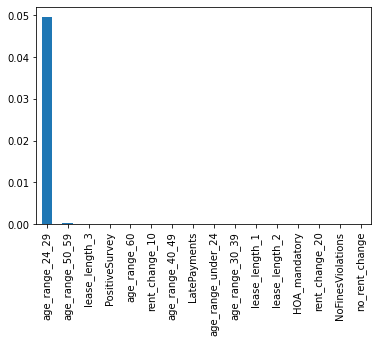

In [12]:
chi_scores = chi2(X,y)
p_values = pd.Series(chi_scores[1],index = X.columns)
p_values.sort_values(ascending = False , inplace = True)
p_values.plot.bar()

From this visual, we are able to conclude that the age range 24-29 is an independent feature. 

## Plotting the Chi-Square Values

<AxesSubplot:>

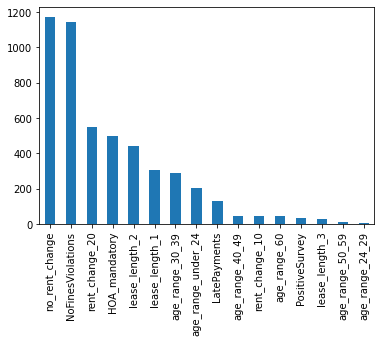

In [13]:
ch_values = pd.Series(chi_scores[0],index = X.columns)
ch_values.sort_values(ascending = False , inplace = True)
ch_values.plot.bar()

## Heatmap for all features
This shows the positive and negative correlations and helps us identify important features.

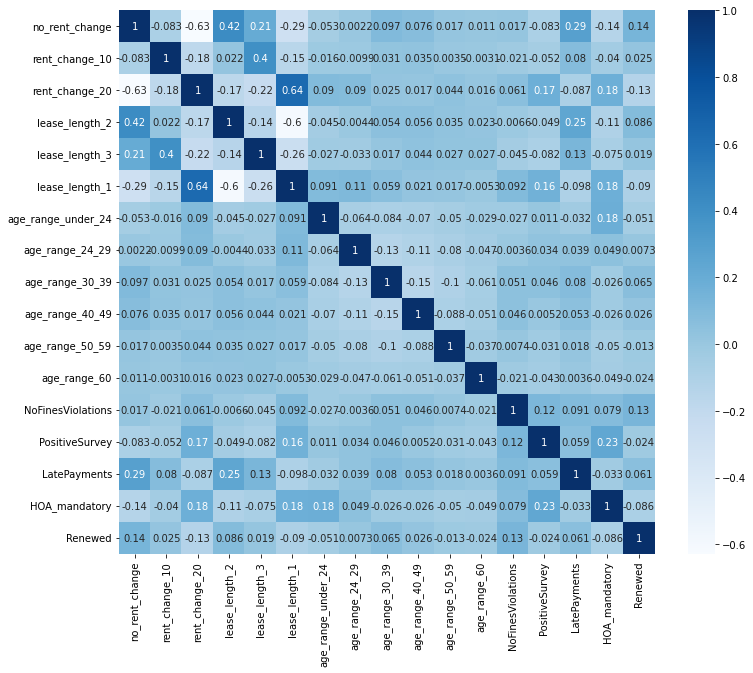

In [14]:
plt.figure(figsize=(12,10))
correlation = df.corr()
sns.heatmap(correlation, annot=True, cmap=plt.cm.Blues)
plt.show()

In [15]:
# First all the Features
correlation_target = abs(correlation["Renewed"])
correlation_target

no_rent_change        0.137282
rent_change_10        0.024754
rent_change_20        0.127915
lease_length_2        0.085821
lease_length_3        0.018795
lease_length_1        0.089716
age_range_under_24    0.051494
age_range_24_29       0.007290
age_range_30_39       0.065303
age_range_40_49       0.025985
age_range_50_59       0.013378
age_range_60          0.024027
NoFinesViolations     0.128865
PositiveSurvey        0.023828
LatePayments          0.061214
HOA_mandatory         0.086500
Renewed               1.000000
Name: Renewed, dtype: float64

In [16]:
## Identify  the Highly Correlated Features
relevant_features = correlation_target[correlation_target>0.08]
relevant_features

no_rent_change       0.137282
rent_change_20       0.127915
lease_length_2       0.085821
lease_length_1       0.089716
NoFinesViolations    0.128865
HOA_mandatory        0.086500
Renewed              1.000000
Name: Renewed, dtype: float64

## From Here we can Decide what Features are important for the business when making desisons about people who might or might not resign thier lease.

# Part II:

Assuming the business is interested in predicting resident renewal, use the dataset to create a renewal likelihood prediction model. Please include supporting work to determine and demonstrate how effective is the prediction model.

Steps

- collect data
- clean data
- data analysis
- build predictive model 
- validate the model
- deploy and monitor the model

## Load the Data and Remove features

The removal of features prevents overfitting and makes our data less noisy. 

In [17]:
## Remove lease_id and age_range_24_29 from our data

df = df.drop(columns = ["lease_id","age_range_24_29"])
df.head()

,no_rent_change,rent_change_10,rent_change_20,lease_length_2,lease_length_3,lease_length_1,age_range_under_24,age_range_30_39,age_range_40_49,age_range_50_59,age_range_60,NoFinesViolations,PositiveSurvey,LatePayments,HOA_mandatory,Renewed
0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [18]:
for i in range(10):
    print(df.columns[i])

no_rent_change
rent_change_10
rent_change_20
lease_length_2
lease_length_3
lease_length_1
age_range_under_24
age_range_30_39
age_range_40_49
age_range_50_59


## Split Attributes

- X will the feature columns
- y will be predictor *Renewed* Column

In [19]:
y = df["Renewed"]
y

0        1
1        0
2        0
3        0
4        0
        ..
79845    0
79846    0
79847    0
79848    1
79849    0
Name: Renewed, Length: 79850, dtype: int64

In [20]:
# since Renewed is assigned to y, we can remove it from the featured columns (X)

df= df.drop(columns = ["Renewed"])
df.head()

,no_rent_change,rent_change_10,rent_change_20,lease_length_2,lease_length_3,lease_length_1,age_range_under_24,age_range_30_39,age_range_40_49,age_range_50_59,age_range_60,NoFinesViolations,PositiveSurvey,LatePayments,HOA_mandatory
0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [21]:
X=df

## Split the data into 70% and 30% Training and Testing sets, respectively

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) 

In [24]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(55895, 15) (23955, 15) (55895,) (23955,)


# Machine Learning Algorithms

## K-Nearest Neighbors

In [25]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 1)

knn.fit(X_train, y_train)

prediction = knn.predict(X_test)

Evalute the K-Nearest Nieghbor Model

In [26]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, prediction))

[[17126  2150]
 [ 3785   894]]


This confusion matrix tells us that there were 17126 True positive, 2150 False positives, 3785 false negatives, and 894 true negatives. 

Next, we will find the accuracy score which is the fraction of samples predicted correctly. 

In [27]:
import sklearn.metrics as metrics
print("Accuracy:",metrics.accuracy_score(y_test, prediction))

Accuracy: 0.7522437904404091


The result is that our model is 75% accurate. Let's see if we can improve this with other methods. 

## Decision Tree Classifier

In [31]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score

In [32]:
classifier = DecisionTreeClassifier()
## train our data on the model
classifier = classifier.fit(X_train,y_train)

## test our Model
y_pred = classifier.predict(X_test)

In [33]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [34]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8040910039657692


Using the decision tree classifier, the model had a 80% accuracy. This was a almost a 5% improvement over KNN. 

# Important Features

In [35]:
importance = classifier.feature_importances_

In [36]:
print("Features - Coefficients: ")
print("---------------------------")

for i in range(len(importance)):
    print(df.columns[i], ": ", importance[i])

Features - Coefficients: 
---------------------------
no_rent_change :  0.23932829265103417
rent_change_10 :  0.026151881388576166
rent_change_20 :  0.02480910822467596
lease_length_2 :  0.02948409937327221
lease_length_3 :  0.021775562228579456
lease_length_1 :  0.07593784455024945
age_range_under_24 :  0.020893930524125453
age_range_30_39 :  0.06481351806508957
age_range_40_49 :  0.027155282461879628
age_range_50_59 :  0.020479494894586205
age_range_60 :  0.017281117195061056
NoFinesViolations :  0.23124712473009262
PositiveSurvey :  0.05119379544804331
LatePayments :  0.057459641520266155
HOA_mandatory :  0.09198930674446862


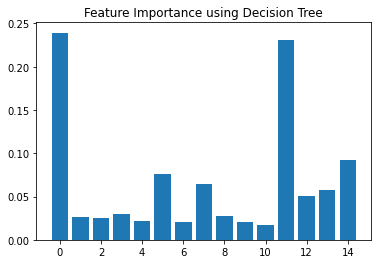

In [37]:
plt.bar([x for x in range(len(importance))], importance)
plt.title("Feature Importance using Decision Tree")
plt.show()

Conclusion: Most important features were: 
- no_rent_change: 0.2393
- NoFinesViolation: 0.231247

## Let's check another model: Logistic Regresion

In [38]:
from sklearn.linear_model import LogisticRegression
import sklearn.linear_model as sk

In [39]:
regression = LogisticRegression()
regression.fit(X_train, y_train)

LogisticRegression()

In [40]:
prediction = regression.predict(X_test)
prediction

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [41]:
print("Accuracy:",metrics.accuracy_score(y_test, prediction))

Accuracy: 0.8047171780421624


## XGBoost

In [42]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [43]:
df.dtypes

no_rent_change        int64
rent_change_10        int64
rent_change_20        int64
lease_length_2        int64
lease_length_3        int64
lease_length_1        int64
age_range_under_24    int64
age_range_30_39       int64
age_range_40_49       int64
age_range_50_59       int64
age_range_60          int64
NoFinesViolations     int64
PositiveSurvey        int64
LatePayments          int64
HOA_mandatory         int64
dtype: object

In [44]:
sum(y)/len(y)

0.19589229805886035

Use stratification in order to maintain the same percentage of people who didn't renew in both the training and testing set. 

In [45]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y) 

In [46]:
sum(y_train)/len(y_train)

0.1958851417837016

In [47]:
sum(y_test)/len(y_test)

0.19590899603423084

In [48]:
from xgboost import XGBClassifier
clf_xgb=XGBClassifier(objective='binary:logistic', missing=1, seed=1)
clf_xgb.fit(X_train, y_train, verbose=True, early_stopping_rounds=10, eval_metric='aucpr', eval_set=[(X_test, y_test)])

[0]	validation_0-aucpr:0.31041
[1]	validation_0-aucpr:0.31148
[2]	validation_0-aucpr:0.31187
[3]	validation_0-aucpr:0.31283
[4]	validation_0-aucpr:0.31315
[5]	validation_0-aucpr:0.31388
[6]	validation_0-aucpr:0.31444


C:\Users\muher\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[7]	validation_0-aucpr:0.31428
[8]	validation_0-aucpr:0.31494
[9]	validation_0-aucpr:0.31478
[10]	validation_0-aucpr:0.31463
[11]	validation_0-aucpr:0.31455
[12]	validation_0-aucpr:0.31501
[13]	validation_0-aucpr:0.31498
[14]	validation_0-aucpr:0.31542
[15]	validation_0-aucpr:0.31497
[16]	validation_0-aucpr:0.31544
[17]	validation_0-aucpr:0.31550
[18]	validation_0-aucpr:0.31578
[19]	validation_0-aucpr:0.31543
[20]	validation_0-aucpr:0.31499
[21]	validation_0-aucpr:0.31496
[22]	validation_0-aucpr:0.31494
[23]	validation_0-aucpr:0.31510
[24]	validation_0-aucpr:0.31460
[25]	validation_0-aucpr:0.31470
[26]	validation_0-aucpr:0.31436
[27]	validation_0-aucpr:0.31436
[28]	validation_0-aucpr:0.31425


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=1,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

C:\Users\muher\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


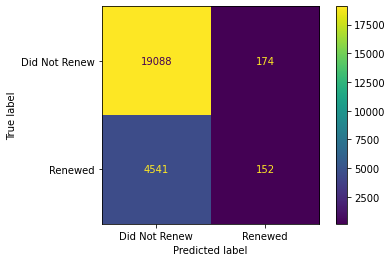

In [49]:
plot_confusion_matrix(clf_xgb, X_test, y_test, values_format='d', display_labels=['Did Not Renew', 'Renewed'])

In this confusion matrix, we see that out of 19,262 that did not renew 99% were correctly classified. Of that 4693 that did renew, 3% were correctly classified. So this result is poor due to the fact that data is imbalanced. To fix this, we will use cross-validation to optimize the parameters.

## Optimizing Parameters using Cross Validation and GridSearch() 
XGBoost has many hyperparameters that require manual configuration, including max_depth, learning_rate, gamma, reg_lambda. So our first step is to find the potential values that will hopefuly improve the model. 

In [51]:
## Round 1
param_grid={
    'max_depth':[3,4,5],
    'learning_rate':[0.1, 0.01, 0.05],
    'gamma':[0,0.25, 1.0],
    'reg_lambda':[0, 1.0, 10.0],
    'scale_pos_weight':[1,3,5]
}

In [52]:
## Round 2
param_grid={
    'max_depth':[4],
    'learning_rate':[0.1, 0.01, 0.05],
    'gamma':[0.25],
    'reg_lambda':[10,20,100],
    'scale_pos_weight':[3]
}

In [53]:
optimal_params=GridSearchCV(estimator=xgb.XGBClassifier(objective='binary:logistic',seed=1, subsample=0.9, colsample_bytree=0.5),
param_grid=param_grid, scoring='roc_auc', verbose=0, n_jobs=10, cv=10)

In [54]:
optimal_params

GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.5,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight

In [55]:
clf_xgb=XGBClassifier(objective='binary:logistic', missing=1, seed=1, gamma=0.25, learn_rate=0.1, max_depth=4, reg_lambda=10,
                     scale_pos_weight=3, subsample=0.9, colsampl_bytree=0.5)
clf_xgb.fit(X_train, y_train, verbose=True, early_stopping_rounds=10, eval_metric='aucpr', eval_set=[(X_test, y_test)])

[07:16:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsampl_bytree", "learn_rate" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-aucpr:0.30318
[1]	validation_0-aucpr:0.30635
[2]	validation_0-aucpr:0.30757
[3]	validation_0-aucpr:0.30889
[4]	validation_0-aucpr:0.30991
[5]	validation_0-aucpr:0.31046
[6]	validation_0-aucpr:0.31193


C:\Users\muher\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[7]	validation_0-aucpr:0.31226
[8]	validation_0-aucpr:0.31325
[9]	validation_0-aucpr:0.31385
[10]	validation_0-aucpr:0.31467
[11]	validation_0-aucpr:0.31484
[12]	validation_0-aucpr:0.31493
[13]	validation_0-aucpr:0.31556
[14]	validation_0-aucpr:0.31561
[15]	validation_0-aucpr:0.31626
[16]	validation_0-aucpr:0.31638
[17]	validation_0-aucpr:0.31636
[18]	validation_0-aucpr:0.31655
[19]	validation_0-aucpr:0.31716
[20]	validation_0-aucpr:0.31714
[21]	validation_0-aucpr:0.31674
[22]	validation_0-aucpr:0.31621
[23]	validation_0-aucpr:0.31674
[24]	validation_0-aucpr:0.31657
[25]	validation_0-aucpr:0.31623
[26]	validation_0-aucpr:0.31594
[27]	validation_0-aucpr:0.31663
[28]	validation_0-aucpr:0.31683


XGBClassifier(base_score=0.5, booster='gbtree', colsampl_bytree=0.5,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              enable_categorical=False, gamma=0.25, gpu_id=-1,
              importance_type=None, interaction_constraints='', learn_rate=0.1,
              learning_rate=0.300000012, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=1, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=1, reg_alpha=0, reg_lambda=10, scale_pos_weight=3,
              seed=1, subsample=0.9, tree_method='exact', validate_parameters=1, ...)

C:\Users\muher\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


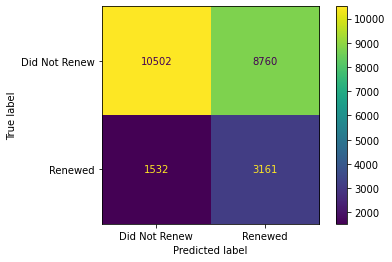

In [61]:
plot_confusion_matrix(clf_xgb, X_test, y_test, values_format='d', display_labels=['Did Not Renew', 'Renewed'])

In [62]:
print("Accuracy:",metrics.accuracy_score(y_test, prediction))

Accuracy: 0.7983719474013776


[07:17:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsampl_bytree", "learn_rate" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-aucpr:0.30047
[1]	validation_0-aucpr:0.30257
[2]	validation_0-aucpr:0.30629
[3]	validation_0-aucpr:0.30691
[4]	validation_0-aucpr:0.30851
[5]	validation_0-aucpr:0.30862


C:\Users\muher\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[6]	validation_0-aucpr:0.31291
[7]	validation_0-aucpr:0.31290
[8]	validation_0-aucpr:0.31300
[9]	validation_0-aucpr:0.31208
[10]	validation_0-aucpr:0.31281
[11]	validation_0-aucpr:0.31277
[12]	validation_0-aucpr:0.31299
[13]	validation_0-aucpr:0.31284
[14]	validation_0-aucpr:0.31295
[15]	validation_0-aucpr:0.31339
[16]	validation_0-aucpr:0.31369
[17]	validation_0-aucpr:0.31365
[18]	validation_0-aucpr:0.31385
[19]	validation_0-aucpr:0.31434
[20]	validation_0-aucpr:0.31427
[21]	validation_0-aucpr:0.31473
[22]	validation_0-aucpr:0.31517
[23]	validation_0-aucpr:0.31518
[24]	validation_0-aucpr:0.31469
[25]	validation_0-aucpr:0.31488
[26]	validation_0-aucpr:0.31487
[27]	validation_0-aucpr:0.31493
[28]	validation_0-aucpr:0.31486
[29]	validation_0-aucpr:0.31483
[30]	validation_0-aucpr:0.31484
[31]	validation_0-aucpr:0.31468
[32]	validation_0-aucpr:0.31467


C:\Users\muher\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


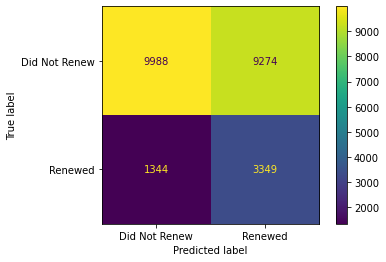

In [57]:
clf_xgb=XGBClassifier(objective='binary:logistic', missing=1, seed=1, gamma=0.5, learn_rate=0.5, max_depth=5, reg_lambda=100,
                     scale_pos_weight=5, subsample=0.9, colsampl_bytree=0.5)
clf_xgb.fit(X_train, y_train, verbose=True, early_stopping_rounds=10, eval_metric='aucpr', eval_set=[(X_test, y_test)])
plot_confusion_matrix(clf_xgb, X_test, y_test, values_format='d', display_labels=['Did Not Renew', 'Renewed'])

3349/4693 = 71% accurately predicted for Renewed  9988/19262 = 52% for did not renew

In [58]:
clf_xgb=XGBClassifier(objective='binary:logistic', missing=1, seed=1, gamma=0.5, learn_rate=0.5, max_depth=5, reg_lambda=100,
                     scale_pos_weight=5, subsample=0.9, colsampl_bytree=0.5, n_estimators=1)
clf_xgb.fit(X_train, y_train)
bst=clf_xgb.get_booster()
for importance_type in ('weight','gain','cover','total_gain', 'total_cover'):print('%s:'%importance_type, bst.get_score(importance_type=importance_type))

[07:17:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsampl_bytree", "learn_rate" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[07:17:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
weight: {'no_rent_change': 1.0, 'rent_change_10': 1.0, 'rent_change_20': 2.0, 'lease_length_1': 2.0, 'age_range_under_24': 2.0, 'age_range_30_39': 3.0, 'age_range_60': 1.0, 'NoFinesViolations': 2.0, 'PositiveSurvey': 1.0, 'LatePayments': 2.0, 'HOA_mand

C:\Users\muher\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [59]:
print("Accuracy:",metrics.accuracy_score(y_test, prediction))

Accuracy: 0.7983719474013776


In [153]:
node_params={'shape':'box','style':'filled, rounded','fillcolor':'#78cbe'}
leaf_params={'shape':'box', 'style':'filled', 'fillcolor':'#e48038'}

In [154]:
xgb.to_graphviz(clf_xgb, num_trees=0, size="10,10",condition_node_params=node_params, leafe_node_params=leaf_params)

XGBoostError: [06:58:49] C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/tree_model.cc:566: Failed to parse graphviz parameters:
	{"graph_attrs": {"leafe_node_params": {"shape": "box", "style": "filled", "fillcolor": "#e48038"}}, "condition_node_params": {"shape": "box", "style": "filled, rounded", "fillcolor": "#78cbe"}}
With error:
[06:58:49] c:\users\administrator\workspace\xgboost-win64_release_1.5.1\dmlc-core\include\dmlc\./json.h:677: Check failed: ch == '\"' (123 vs. ") : Error at Line 0, around ^`"shape": "box", "style": "filled", "fillcolor": "#e48038"}}, "c`, Expect '"' but get '{'

In [155]:
xgb.to_graphviz(clf_xgb, num_trees=0, size="10,10")

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [68]:
import time
import pandas as pd
import itertools
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline

from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import VotingClassifier
from catboost import CatBoostClassifier

In [71]:
def get_pipeline(X, model):
    """Return a pipeline to preprocess data and bundle with a model.
    
    Args:
        X (object): X_train data. 
        model (object): scikit-learn model object, i.e. XGBClassifier
    
    Returns: 
        Pipeline (object): Pipeline steps. 
    """
    
    numeric_columns = list(X.select_dtypes(exclude=['object']).columns.values.tolist())    
    categorical_columns = list(X.select_dtypes(include=['object']).columns.values.tolist())
    numeric_pipeline = SimpleImputer(strategy='constant')
    categorical_pipeline = OneHotEncoder(handle_unknown='ignore')

    preprocessor = ColumnTransformer(
        transformers=[
            ('numeric', numeric_pipeline, numeric_columns),
            ('categorical', categorical_pipeline, categorical_columns),
            ], remainder='passthrough'
    )

    bundled_pipeline = imbpipeline(steps=[
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=1)),
        ('scaler', MinMaxScaler()),
        ('model', model)
    ])
    
    return bundled_pipeline

In [72]:
model = XGBClassifier()
example_pipeline = get_pipeline(X_train, model)
example_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numeric',
                                                  SimpleImputer(strategy='constant'),
                                                  ['no_rent_change',
                                                   'rent_change_10',
                                                   'rent_change_20',
                                                   'lease_length_2',
                                                   'lease_length_3',
                                                   'lease_length_1',
                                                   'age_range_under_24',
                                                   'age_range_30_39',
                                                   'age_range_40_49',
                                                   'age_range_50_59',
                                                   'age_range_6

In [73]:
def select_model(X, y, pipeline=None):
    """Test a range of classifiers and return their performance metrics on training data.
    
    Args:
        X (object): Pandas dataframe containing X_train data. 
        y (object): Pandas dataframe containing y_train data. 
        pipeline (object): Pipeline from get_pipeline().

    Return:
        df (object): Pandas dataframe containing model performance data. 
    """
    
    classifiers = {}
    classifiers.update({"DummyClassifier": DummyClassifier(strategy='most_frequent')})
    classifiers.update({"XGBClassifier": XGBClassifier(use_label_encoder=False, 
                                                       eval_metric='logloss',
                                                       objective='binary:logistic',
                                                      )})
    classifiers.update({"LGBMClassifier": LGBMClassifier()})
    classifiers.update({"RandomForestClassifier": RandomForestClassifier()})
    classifiers.update({"DecisionTreeClassifier": DecisionTreeClassifier()})
    classifiers.update({"ExtraTreeClassifier": ExtraTreeClassifier()})
    classifiers.update({"ExtraTreesClassifier": ExtraTreeClassifier()})    
    classifiers.update({"AdaBoostClassifier": AdaBoostClassifier()})
    classifiers.update({"KNeighborsClassifier": KNeighborsClassifier()})
    classifiers.update({"RidgeClassifier": RidgeClassifier()})
    classifiers.update({"SGDClassifier": SGDClassifier()})
    classifiers.update({"BaggingClassifier": BaggingClassifier()})
    classifiers.update({"BernoulliNB": BernoulliNB()})
    classifiers.update({"SVC": SVC()})
    classifiers.update({"CatBoostClassifier":CatBoostClassifier(silent=True)})
    
    # Stacking
    models = []

    models = []
    models.append(('XGBClassifier', XGBClassifier(use_label_encoder=False, eval_metric='logloss', objective='binary:logistic')))
    models.append(('CatBoostClassifier', CatBoostClassifier(silent=True)))
    models.append(('BaggingClassifier', BaggingClassifier()))
    classifiers.update({"VotingClassifier (XGBClassifier, CatBoostClassifier, BaggingClassifier)": VotingClassifier(models)})

    models = []
    models.append(('XGBClassifier', XGBClassifier(use_label_encoder=False, eval_metric='logloss', objective='binary:logistic')))
    models.append(('LGBMClassifier', LGBMClassifier()))
    models.append(('CatBoostClassifier', CatBoostClassifier(silent=True)))
    classifiers.update({"VotingClassifier (XGBClassifier, LGBMClassifier, CatBoostClassifier)": VotingClassifier(models)})
    
    models = []
    models.append(('XGBClassifier', XGBClassifier(use_label_encoder=False, eval_metric='logloss', objective='binary:logistic')))
    models.append(('RandomForestClassifier', RandomForestClassifier()))
    models.append(('DecisionTreeClassifier', DecisionTreeClassifier()))
    classifiers.update({"VotingClassifier (XGBClassifier, RandomForestClassifier, DecisionTreeClassifier)": VotingClassifier(models)})

    models = []
    models.append(('XGBClassifier', XGBClassifier(use_label_encoder=False, eval_metric='logloss', objective='binary:logistic')))
    models.append(('AdaBoostClassifier', AdaBoostClassifier()))
    models.append(('ExtraTreeClassifier', ExtraTreeClassifier()))
    classifiers.update({"VotingClassifier (XGBClassifier, AdaBoostClassifier, ExtraTreeClassifier)": VotingClassifier(models)})
    
    models = []
    models.append(('XGBClassifier', XGBClassifier(use_label_encoder=False, eval_metric='logloss', objective='binary:logistic')))
    models.append(('ExtraTreesClassifier', ExtraTreesClassifier()))
    classifiers.update({"VotingClassifier (XGBClassifier, ExtraTreesClassifier)": VotingClassifier(models)})    
    
    df_models = pd.DataFrame(columns=['model', 'run_time', 'accuracy'])

    for key in classifiers:
        
        start_time = time.time()

        pipeline = get_pipeline(X_train, classifiers[key])
        
        cv = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')

        row = {'model': key,
               'run_time': format(round((time.time() - start_time)/60,2)),
               'accuracy': cv.mean(),
        }

        df_models = df_models.append(row, ignore_index=True)
        
    df_models = df_models.sort_values(by='accuracy', ascending=False)
    return df_models

In [74]:
models = select_model(X_train, y_train)
models.head(20)

,model,run_time,accuracy
0,DummyClassifier,0.05,0.804115
8,KNeighborsClassifier,0.87,0.766580
10,SGDClassifier,0.09,0.659200
7,AdaBoostClassifier,0.19,0.642258
9,RidgeClassifier,0.07,0.640827
2,LGBMClassifier,0.08,0.622900
19,"VotingClassifier (XGBClassifier, ExtraTreesCla...",0.71,0.622721
12,BernoulliNB,0.07,0.621505
13,SVC,43.14,0.620181
16,"VotingClassifier (XGBClassifier, LGBMClassifie...",2.23,0.619537


In [82]:
stacked_models = []
stacked_models.append(('KNeighborsClassifier', KNeighborsClassifier()))
stacked_models.append(('SGDClassifier', SGDClassifier()))
stacked_models.append(('AdaBoostClassifier', AdaBoostClassifier()))
stacked_model = VotingClassifier(stacked_models)

In [83]:
bundled_pipeline = get_pipeline(X_train, stacked_model)
bundled_pipeline.fit(X_train, y_train)
y_pred = bundled_pipeline.predict(X_test)

In [84]:
roc_auc = roc_auc_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred)

In [85]:
print('ROC/AUC:', roc_auc)
print('Accuracy:', accuracy)
print('F1 score:', f1_score)

ROC/AUC: 0.5947640975653876
Accuracy: 0.6776038405343352
F1 score: 0.3578614783404008


In [86]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.73      0.78     19262
           1       0.29      0.46      0.36      4693

    accuracy                           0.68     23955
   macro avg       0.57      0.59      0.57     23955
weighted avg       0.74      0.68      0.70     23955



In [87]:
confusion_matrix(y_test, y_pred)

array([[14080,  5182],
       [ 2541,  2152]], dtype=int64)